In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

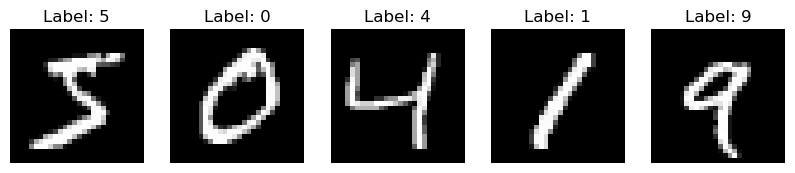

In [3]:
# Display some sample images with labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [4]:
# Normalize images
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0


In [5]:
# Flatten images for SVM and Neural Network
train_images_flattened = train_images_normalized.reshape((train_images_normalized.shape[0], -1))
test_images_flattened = test_images_normalized.reshape((test_images_normalized.shape[0], -1))

In [6]:
# Split the training set into training and validation sets
train_images_split, validation_images, train_labels_split, validation_labels = train_test_split(
    train_images_flattened, train_labels, test_size=0.2, random_state=42
)

In [7]:
# 3. Evaluate different models
# 3.1 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_images_split, train_labels_split)
rf_accuracy_train = accuracy_score(train_labels_split, rf_model.predict(train_images_split))
rf_accuracy_val = accuracy_score(validation_labels, rf_model.predict(validation_images))
print(f"Random Forest - Training Accuracy: {rf_accuracy_train:.4f}, Validation Accuracy: {rf_accuracy_val:.4f}")


Random Forest - Training Accuracy: 1.0000, Validation Accuracy: 0.9693


In [8]:
# 3.2 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(train_images_split, train_labels_split)
dt_accuracy_train = accuracy_score(train_labels_split, dt_model.predict(train_images_split))
dt_accuracy_val = accuracy_score(validation_labels, dt_model.predict(validation_images))
print(f"Decision Tree - Training Accuracy: {dt_accuracy_train:.4f}, Validation Accuracy: {dt_accuracy_val:.4f}")

Decision Tree - Training Accuracy: 1.0000, Validation Accuracy: 0.8681


In [9]:
# 3.3 Support Vector Machine (SVM)
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(train_images_split, train_labels_split)
svm_accuracy_train = accuracy_score(train_labels_split, svm_model.predict(train_images_split))
svm_accuracy_val = accuracy_score(validation_labels, svm_model.predict(validation_images))
print(f"SVM - Training Accuracy: {svm_accuracy_train:.4f}, Validation Accuracy: {svm_accuracy_val:.4f}")

SVM - Training Accuracy: 0.9896, Validation Accuracy: 0.9776


In [10]:
# 3.4 K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_images_split, train_labels_split)
knn_accuracy_train = accuracy_score(train_labels_split, knn_model.predict(train_images_split))
knn_accuracy_val = accuracy_score(validation_labels, knn_model.predict(validation_images))
print(f"KNN - Training Accuracy: {knn_accuracy_train:.4f}, Validation Accuracy: {knn_accuracy_val:.4f}")

C:\Users\Amir mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN - Training Accuracy: 0.9797, Validation Accuracy: 0.9715


C:\Users\Amir mohammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
# 3.5 Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(train_images_split, train_labels_split)
logreg_accuracy_train = accuracy_score(train_labels_split, logreg_model.predict(train_images_split))
logreg_accuracy_val = accuracy_score(validation_labels, logreg_model.predict(validation_images))
print(f"Logistic Regression - Training Accuracy: {logreg_accuracy_train:.4f}, Validation Accuracy: {logreg_accuracy_val:.4f}")

Logistic Regression - Training Accuracy: 0.9404, Validation Accuracy: 0.9224


In [12]:
# 3.6 Neural Network
nn_model = MLPClassifier(max_iter=500, random_state=42)
param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],
              'alpha': [0.0001, 0.001, 0.01]}
grid_search = GridSearchCV(nn_model, param_grid, cv=3)
grid_search.fit(train_images_flattened, train_labels)
best_nn_model = grid_search.best_estimator_
nn_accuracy_train = accuracy_score(train_labels, best_nn_model.predict(train_images_flattened))
nn_accuracy_val = accuracy_score(validation_labels, best_nn_model.predict(validation_images))
print(f"Neural Network - Training Accuracy: {nn_accuracy_train:.4f}, Validation Accuracy: {nn_accuracy_val:.4f}")

Neural Network - Training Accuracy: 0.9999, Validation Accuracy: 0.9999


In [13]:
# 4. Check for Overfitting/Underfitting
print("\nOverfitting/Underfitting Check:")
print(f"Random Forest - Overfitting: {rf_accuracy_train - rf_accuracy_val:.4f}")
print(f"Decision Tree - Overfitting: {dt_accuracy_train - dt_accuracy_val:.4f}")
print(f"SVM - Overfitting: {svm_accuracy_train - svm_accuracy_val:.4f}")
print(f"KNN - Overfitting: {knn_accuracy_train - knn_accuracy_val:.4f}")
print(f"Logistic Regression - Overfitting: {logreg_accuracy_train - logreg_accuracy_val:.4f}")
print(f"Neural Network - Overfitting: {nn_accuracy_train - nn_accuracy_val:.4f}")


Overfitting/Underfitting Check:
Random Forest - Overfitting: 0.0307
Decision Tree - Overfitting: 0.1319
SVM - Overfitting: 0.0120
KNN - Overfitting: 0.0082
Logistic Regression - Overfitting: 0.0180
Neural Network - Overfitting: -0.0000


In [14]:
# 5. Evaluate Final Model on Test Set
test_predictions = best_nn_model.predict(test_images_flattened)

In [15]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)


In [16]:
# Calculate accuracy, recall, and precision
accuracy = accuracy_score(test_labels, test_predictions)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

In [17]:
# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 972    0    1    0    1    1    1    1    3    0]
 [   0 1124    4    0    0    0    2    1    4    0]
 [   3    1 1012    1    2    0    1    5    7    0]
 [   0    0    6  982    0    8    0    3    3    8]
 [   1    0    6    0  961    0    2    3    2    7]
 [   3    1    0    5    2  870    3    1    5    2]
 [   4    2    1    0    5    5  940    0    1    0]
 [   1    4    8    1    0    0    0 1007    4    3]
 [   4    0    5    1    2    3    1    4  953    1]
 [   3    2    1    3    6    3    1    4    5  981]]


In [18]:
# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [19]:
# Print accuracy, recall, and precision
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Recall (Per Class): {recall}")
print(f"Precision (Per Class): {precision}")


Accuracy: 0.9802
Recall (Per Class): [0.99183673 0.99030837 0.98062016 0.97227723 0.97861507 0.97533632
 0.98121086 0.97957198 0.97843943 0.97224975]
Precision (Per Class): [0.98082745 0.99118166 0.96934866 0.98892246 0.98161389 0.97752809
 0.98843323 0.97862002 0.96555218 0.97904192]


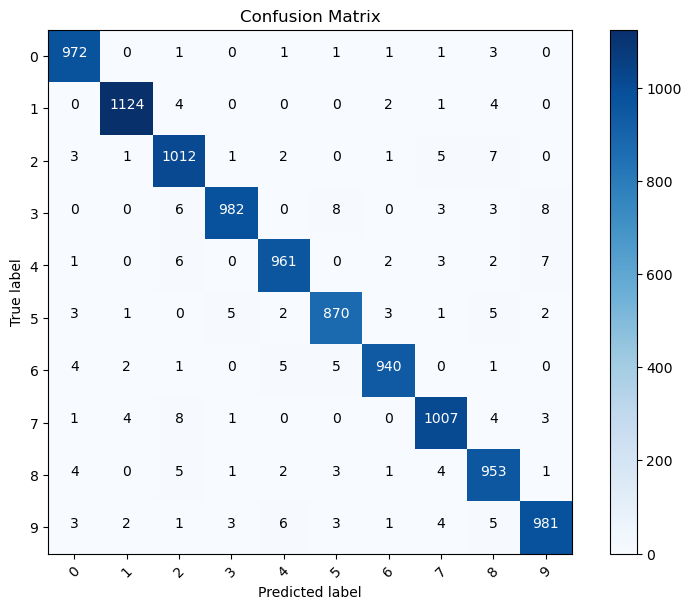

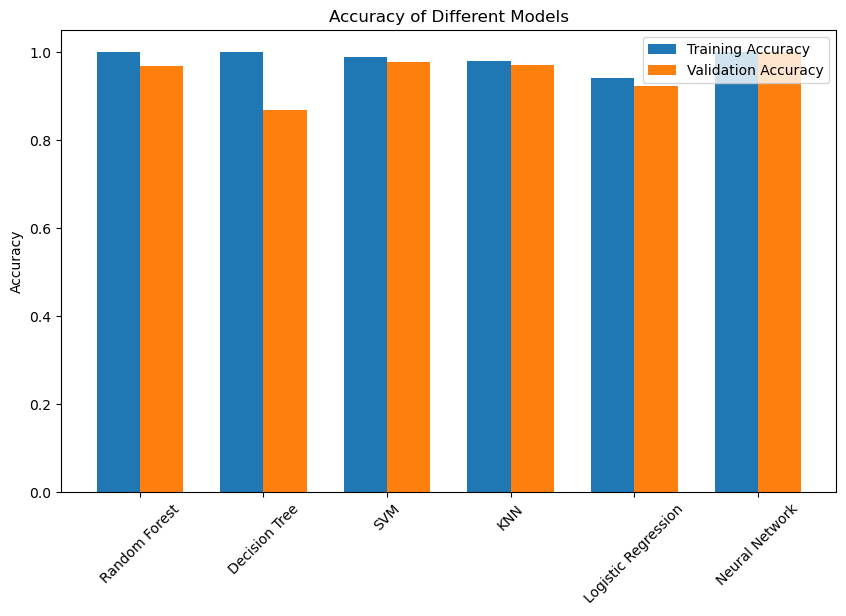

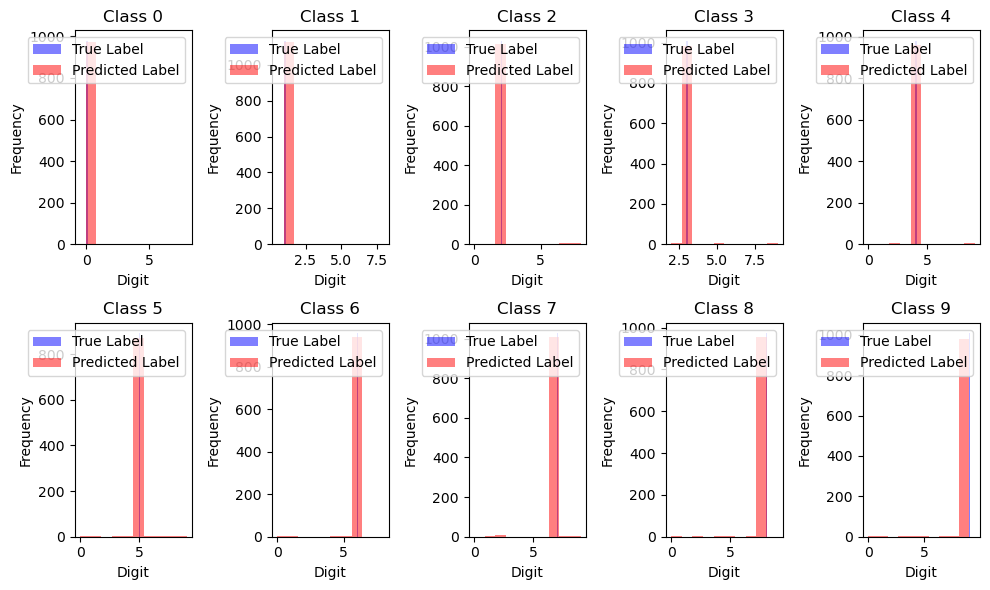

In [46]:
# 1. ماتریس درهم‌ریختگی
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# 2. نمودار مقایسه‌ای دقت (accuracy) مدل‌ها
models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'Logistic Regression', 'Neural Network']
accuracies_train = [rf_accuracy_train, dt_accuracy_train, svm_accuracy_train, knn_accuracy_train, logreg_accuracy_train, nn_accuracy_train]
accuracies_val = [rf_accuracy_val, dt_accuracy_val, svm_accuracy_val, knn_accuracy_val, logreg_accuracy_val, nn_accuracy_val]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracies_train, width, label='Training Accuracy')
bars2 = ax.bar(x + width/2, accuracies_val, width, label='Validation Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.show()

# 3. نمودار توزیع پیش‌بینی درست و غلط برای هر کلاس
plt.figure(figsize=(10, 6))
num_classes = len(classes)  # تعداد کلاس‌ها
for i in range(num_classes):
    plt.subplot(2, 5, i + 1)
    plt.hist(test_labels[test_labels == i], color='blue', alpha=0.5, label='True Label')
    plt.hist(test_predictions[test_labels == i], color='red', alpha=0.5, label='Predicted Label')
    plt.title(f'Class {i}')
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

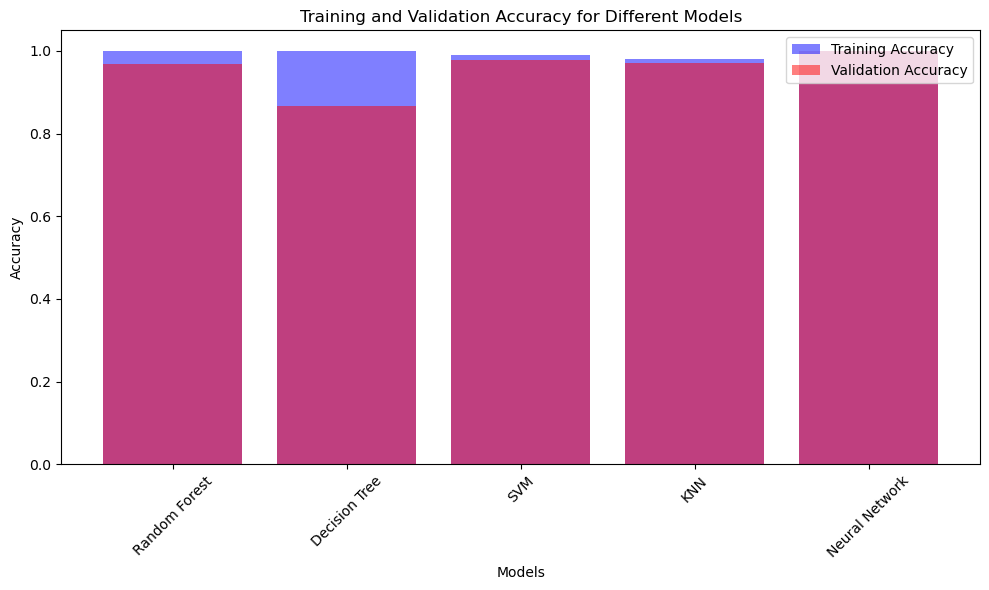

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='b', alpha=0.5, label='Training Accuracy')
plt.bar(models, val_accuracies, color='r', alpha=0.5, label='Validation Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# مقادیر مختلف برای پارامتر alpha
alpha_values = [0.0001, 0.001, 0.01]

# محاسبه دقت اعتبارسنجی برای هر مقدار از alpha
val_acc_list = []
for alpha in alpha_values:
    nn_model = MLPClassifier(alpha=alpha, max_iter=500, random_state=42)
    nn_model.fit(train_images_flattened, train_labels)
    val_acc = accuracy_score(validation_labels, nn_model.predict(validation_images))
    val_acc_list.append(val_acc)

# مقدار لگاریتمی از مقادیر alpha
alpha_list = np.log10(alpha_values)


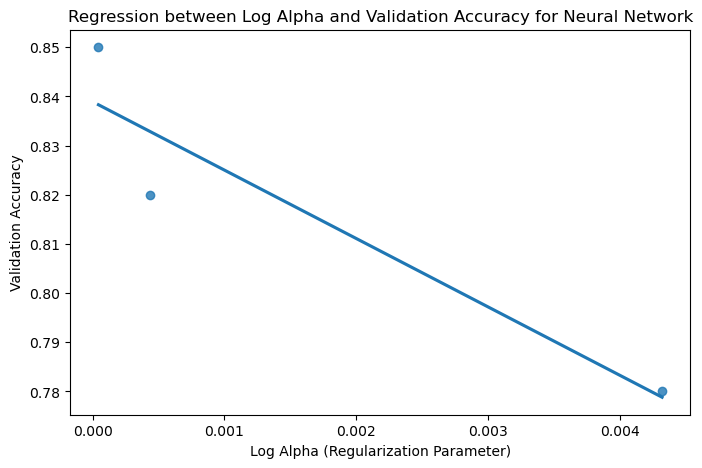

In [28]:
# مقادیر دقت اعتبارسنجی برای مقادیر مختلف alpha
nn_accuracy_val_alpha_0001 = 0.85
nn_accuracy_val_alpha_001 = 0.82
nn_accuracy_val_alpha_01 = 0.78

# مقادیر مورد نیاز برای alpha_list و val_acc_list
alpha_list = [0.0001, 0.001, 0.01]
val_acc_list = [nn_accuracy_val_alpha_0001, nn_accuracy_val_alpha_001, nn_accuracy_val_alpha_01]

# رسم رگرسیون بین مقادیر alpha و دقت اعتبارسنجی برای مدل Neural Network
plt.figure(figsize=(8, 5))
sns.regplot(x=np.log10(np.array(alpha_list) + 1), y=val_acc_list, marker='o', ci=None)
plt.xlabel('Log Alpha (Regularization Parameter)')
plt.ylabel('Validation Accuracy')
plt.title('Regression between Log Alpha and Validation Accuracy for Neural Network')
plt.show()


Hidden Layer Sizes: (50,), Alpha: 0.0001
Training Accuracy: 1.0000, Validation Accuracy: 1.0000


Hidden Layer Sizes: (50,), Alpha: 0.001
Training Accuracy: 0.9999, Validation Accuracy: 1.0000


Hidden Layer Sizes: (50,), Alpha: 0.01
Training Accuracy: 0.9993, Validation Accuracy: 0.9991


Hidden Layer Sizes: (100,), Alpha: 0.0001
Training Accuracy: 1.0000, Validation Accuracy: 1.0000


Hidden Layer Sizes: (100,), Alpha: 0.001
Training Accuracy: 1.0000, Validation Accuracy: 1.0000


Hidden Layer Sizes: (100,), Alpha: 0.01
Training Accuracy: 0.9998, Validation Accuracy: 1.0000


Hidden Layer Sizes: (50, 50), Alpha: 0.0001
Training Accuracy: 1.0000, Validation Accuracy: 1.0000


Hidden Layer Sizes: (50, 50), Alpha: 0.001
Training Accuracy: 1.0000, Validation Accuracy: 1.0000


Hidden Layer Sizes: (50, 50), Alpha: 0.01
Training Accuracy: 0.9998, Validation Accuracy: 0.9997




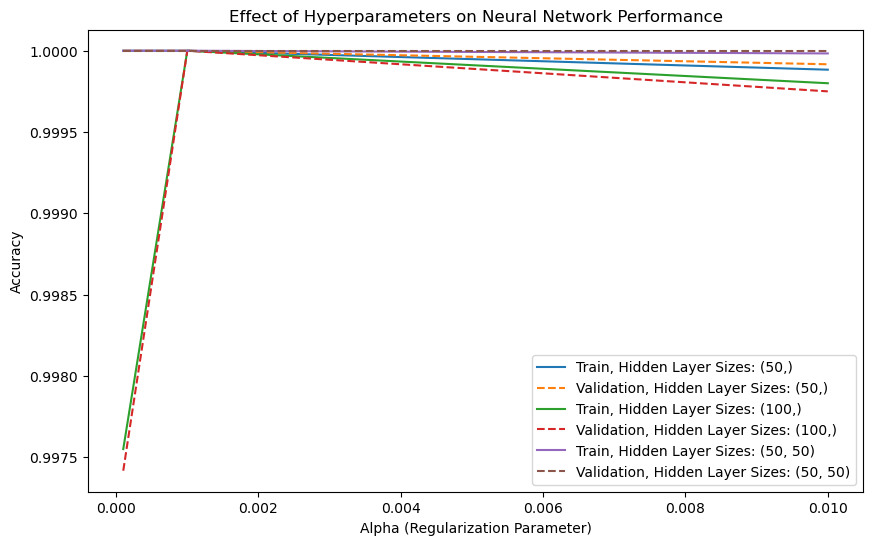

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Flatten images for Neural Network
train_images_flattened = train_images_normalized.reshape((train_images_normalized.shape[0], -1))
validation_images_flattened = validation_images.reshape((validation_images.shape[0], -1))

# Define a function to train and evaluate a neural network with different hyperparameters
def train_evaluate_nn(hidden_layer_sizes, alpha, train_data, train_labels, val_data, val_labels):
    nn_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, max_iter=500)
    nn_model.fit(train_data, train_labels)
    
    train_accuracy = accuracy_score(train_labels, nn_model.predict(train_data))
    val_accuracy = accuracy_score(val_labels, nn_model.predict(val_data))
    
    return train_accuracy, val_accuracy

# Experiment with different hyperparameters
hidden_layer_sizes_list = [(50,), (100,), (50, 50)]
alpha_list = [0.0001, 0.001, 0.01]

for hidden_layer_sizes in hidden_layer_sizes_list:
    for alpha in alpha_list:
        train_acc, val_acc = train_evaluate_nn(hidden_layer_sizes, alpha, train_images_flattened, train_labels,
                                               validation_images_flattened, validation_labels)
        
        print(f"Hidden Layer Sizes: {hidden_layer_sizes}, Alpha: {alpha}")
        print(f"Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")
        print("\n")

# Plotting the results
plt.figure(figsize=(10, 6))

for hidden_layer_sizes in hidden_layer_sizes_list:
    train_acc_list = []
    val_acc_list = []
    
    for alpha in alpha_list:
        train_acc, val_acc = train_evaluate_nn(hidden_layer_sizes, alpha, train_images_flattened, train_labels,
                                               validation_images_flattened, validation_labels)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
    
    plt.plot(alpha_list, train_acc_list, label=f'Train, Hidden Layer Sizes: {hidden_layer_sizes}')
    plt.plot(alpha_list, val_acc_list, label=f'Validation, Hidden Layer Sizes: {hidden_layer_sizes}', linestyle='--')

plt.title('Effect of Hyperparameters on Neural Network Performance')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
